In [18]:
## 10-805 Machine Learning with Large Dataset  Final Project
## Yelp Challenge
## Code snippet :  Connecting to remote sql server using python
## Date : Oct. 22nd 2017
## Name : Jingyu Wang

## Assumption : Please install mysql connector on your macs

import mysql.connector
from mysql.connector import errorcode
import datetime
import matplotlib.pyplot as plt
import numpy as np
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.stem.porter import PorterStemmer 
from nltk.corpus import stopwords
import string
import csv

# step 1 : connect to the remote MySQL server
try:
    cnx = mysql.connector.connect(user='Admin10805', password='10805fall2017',
                          host='yelp2.csfuygoxtob2.us-east-2.rds.amazonaws.com',
                          database='yelp_db')
except mysql.connector.Error as err:
    if err.errno == errorcode.ER_ACCESS_DENIED_ERROR:
        print("Something is wrong with your user name or password")
    elif err.errno == errorcode.ER_BAD_DB_ERROR:
        print("Database does not exist")
    else:
        print(err)
print("connected")
# else:
#   cnx.close()


connected


In [19]:
#Convert the 1-gram tokens into tf-idf feature represetation
#Extract word combination from the review dataset
#Up to distance D = 5. If two words in the review are not more than D apart, the combination will be considered
#The output will be stored in a csv file where each line is all possible word combination for each review
cursor = cnx.cursor()
query = ("SELECT id,text FROM review_token")
cursor.execute(query) 
results = cursor.fetchall()
print("Query done")

Query done


In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

corpus = [str(elem) for elem in results]

tf_idf = vectorizer.fit_transform(corpus)

In [21]:
np.save("1gram_tf_idf.npy",tf_idf)

In [42]:
import sys
import numpy as np
from numpy import genfromtxt
import string
count = 0
total = 0

score = genfromtxt('metric_dist.csv')[1:]

print('mean',np.mean(score))
print('median',np.median(score))
print("std",np.std(score))

('mean', 1.9008692821482081)
('median', 0.0)
('std', 5.9158010852855316)


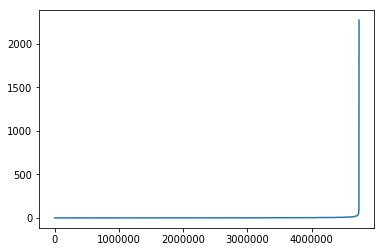

In [23]:
import matplotlib.pyplot as plt
plt.plot(score)
plt.show()

In [45]:
np.set_printoptions(threshold=np.inf)
idx = (int)(len(score)*0.95)
tmp = (score[idx:len(score)])

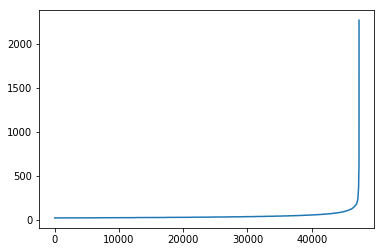

2269.0
21.0


In [44]:
plt.plot(tmp)
plt.show()
print(max(tmp))
print(min(tmp))

In [41]:
print(len([x for x in score if x<=10]))

4593061
